In [1]:
%load_ext autoreload
%autoreload 2

# This tells Python to show the plots inside this notebook.
%matplotlib inline
# We have to import the plotting library into this Jupyter notebook
# We only have to do this once (unless you close and open the notebook,
# then you'll have to do it again)
import matplotlib.pyplot as plt

import pandas

In [2]:
nasa_astronaut_dataset = pandas.read_csv("astronauts.csv")
nasa_astronaut_dataset

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission
0,Joseph M. Acaba,2004.0,19.0,Active,5/17/1967,"Inglewood, CA",Male,University of California-Santa Barbara; Univer...,Geology,Geology,NaN,NaN,2,3307,2,13.0,"STS-119 (Discovery), ISS-31/32 (Soyuz)",NaN,NaN
1,Loren W. Acton,NaN,NaN,Retired,3/7/1936,"Lewiston, MT",Male,Montana State University; University of Colorado,Engineering Physics,Solar Physics,NaN,NaN,1,190,0,0.0,STS 51-F (Challenger),NaN,NaN
2,James C. Adamson,1984.0,10.0,Retired,3/3/1946,"Warsaw, NY",Male,US Military Academy; Princeton University,Engineering,Aerospace Engineering,Colonel,US Army (Retired),2,334,0,0.0,"STS-28 (Columbia), STS-43 (Atlantis)",NaN,NaN
3,Thomas D. Akers,1987.0,12.0,Retired,5/20/1951,"St. Louis, MO",Male,University of Missouri-Rolla,Applied Mathematics,Applied Mathematics,Colonel,US Air Force (Retired),4,814,4,29.0,"STS-41 (Discovery), STS-49 (Endeavor), STS-61 ...",NaN,NaN
4,Buzz Aldrin,1963.0,3.0,Retired,1/20/1930,"Montclair, NJ",Male,US Military Academy; MIT,Mechanical Engineering,Astronautics,Colonel,US Air Force (Retired),2,289,2,8.0,"Gemini 12, Apollo 11",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,David A. Wolf,1990.0,13.0,Retired,8/23/1956,"Indianapolis, IN",Male,Purdue University; Indiana University,Electrical Engineering,Medicine,NaN,NaN,3,4044,7,41.0,STS-58 (Columbia). STS-86/89 (Atlantis/Endeavo...,NaN,NaN
353,Neil W. Woodward III,1998.0,17.0,Retired,7/26/1962,"Chicago, IL",Male,MIT; University of Texas-Austin; George Washin...,Physics,Physics; Business Management,Commander,US Navy,0,0,0,0.0,NaN,NaN,NaN
354,Alfred M. Worden,1966.0,5.0,Retired,2/7/1932,"Jackson, MI",Male,US Military Academy; University of Michigan,Military Science,Aeronautical & Astronautical Engineering,Colonel,US Air Force (Retired),1,295,1,0.5,Apollo 15,NaN,NaN
355,John W. Young,1962.0,2.0,Retired,9/24/1930,"San Francisco, CA",Male,Georgia Institute of Technology,Aeronautical Engineering,NaN,Captain,US Navy (Retired),6,835,3,20.0,"Gemini 3, Gemini 10, Apollo 10, Apollo 16, STS...",NaN,NaN


In [3]:
row = nasa_astronaut_dataset["Space Flight (hr)"].idxmax()
astronaut = nasa_astronaut_dataset["Name"][row]
hours = nasa_astronaut_dataset["Space Flight (hr)"][row]

print(f"{astronaut} has the most flight hours with a total of {hours} hours.")


Jeffrey N. Williams has the most flight hours with a total of 12818 hours.


In [4]:
gender_occurrence = nasa_astronaut_dataset.groupby('Gender').count()
gender_military = gender_occurrence["Military Rank"]
gender_occurrence_name = gender_occurrence["Name"]
print (gender_military)
#print (gender_occurrence)
#print (gender_occurrence_name)

Gender
Female     13
Male      194
Name: Military Rank, dtype: int64


In [5]:
#gender = nasa_astronaut_dataset["Gender"]
gender = ["Female", "Male"]
count_row = nasa_astronaut_dataset.shape[0]
print (gender)

['Female', 'Male']


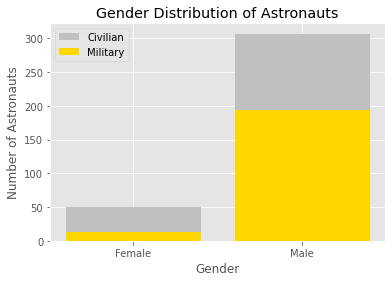

In [6]:
plt.style.use("ggplot")
plt.bar(gender, gender_occurrence_name, width=0.8, label='Civilian', color='silver')
plt.bar(gender, gender_military, width = 0.8, label = 'Military', color = 'gold')
plt.xlabel("Gender")
plt.ylabel("Number of Astronauts")
plt.title("Gender Distribution of Astronauts")

plt.legend(loc="upper left")
plt.show()

In [7]:
#Age at selection
birth_date = nasa_astronaut_dataset["Birth Date"]
birth_years_list = []
selection_years_list = []
selection_age_list = []

def get_birth_years_list(birth_date):
    """
    Extracts the year from the D.O.B. column of the dataset and creates a list.
    
    args:
        birth_date: the "Birth Date" column of the dataset
        
    return:
        birth_years_list: a list of the birth years 
    """
    for i in birth_date:
        birth_year = int(i[-4:])
        birth_years_list.append(birth_year)

    return birth_years_list

selection_year = nasa_astronaut_dataset["Year"]

def get_selection_years_list(selection_year):
    """
    Create a list of the astronaut selection years.
    
    args:
        selection_year: the "Year" column of the dataset.
    
    return:
        selection_years_list: a list of all of the selection years.
    """
    for i in selection_year:
        selection_years_list.append(i)
        
    return selection_years_list

def get_selection_age(birth_date, selection_year):
    """
    """
    birth_year = get_birth_years_list(birth_date)
    year_of_selection = get_selection_years_list(selection_year)
    
    for i in birth_year:
        for j in year_of_selection:
            if j == None:
                selection_age_list.append("N/A")
                break
            else:
                selection_age_list.append(j-i)
                break

    return selection_age_list

print (get_selection_age(birth_date, selection_year))
#print (get_selection_years_list(selection_year))           

[37.0, 68.0, 58.0, 53.0, 74.0, 49.0, 67.0, 45.0, 71.0, 45.0, 45.0, 37.0, 55.0, 44.0, 74.0, 41.0, 50.0, 28.0, 52.0, 51.0, 51.0, 45.0, 51.0, 60.0, 73.0, 72.0, 34.0, 62.0, 45.0, 62.0, 67.0, 40.0, 58.0, 76.0, 40.0, 48.0, 53.0, 73.0, 61.0, 37.0, 61.0, 48.0, 48.0, 53.0, 59.0, 48.0, 70.0, 43.0, 47.0, 55.0, 45.0, 46.0, 35.0, 52.0, 55.0, 47.0, 79.0, 72.0, 57.0, 61.0, 34.0, 56.0, 70.0, 69.0, 42.0, 54.0, 69.0, 43.0, 44.0, 50.0, 43.0, 57.0, 52.0, 58.0, 54.0, 44.0, 45.0, 74.0, 74.0, 77.0, 58.0, 45.0, 61.0, 67.0, 64.0, 55.0, 72.0, 42.0, 46.0, 51.0, 54.0, 42.0, 51.0, 69.0, 55.0, 61.0, 36.0, 46.0, 74.0, 62.0, 72.0, 34.0, 71.0, 65.0, 43.0, 48.0, 39.0, 37.0, 30.0, 55.0, 58.0, 47.0, 44.0, 47.0, 47.0, 47.0, 74.0, 43.0, 68.0, 58.0, 43.0, 56.0, 56.0, 72.0, 74.0, 49.0, 48.0, 68.0, 58.0, 74.0, 83.0, 52.0, 42.0, 75.0, 47.0, 59.0, 73.0, 63.0, 47.0, 65.0, 78.0, 46.0, 53.0, 71.0, 48.0, 40.0, 52.0, 48.0, 48.0, 58.0, 71.0, 63.0, 53.0, 46.0, 78.0, 52.0, 52.0, 42.0, 46.0, 49.0, 40.0, 54.0, 45.0, 43.0, 60.0, 65.0, 36.

In [8]:
birth_date = nasa_astronaut_dataset["Birth Date"]
selection_year = nasa_astronaut_dataset["Year"]

birth_date = birth_date.astype(str)

nasa_astronaut_dataset['Birth Date'] = nasa_astronaut_dataset['Birth Date'].str[-4:]

nasa_astronaut_dataset['Birth Date'] = nasa_astronaut_dataset['Birth Date'].astype(float)

nasa_astronaut_dataset['Selection Age'] = nasa_astronaut_dataset['Year'] - nasa_astronaut_dataset['Birth Date']

nasa_astronaut_dataset.head(10)

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission,Selection Age
0,Joseph M. Acaba,2004.0,19.0,Active,1967.0,"Inglewood, CA",Male,University of California-Santa Barbara; Univer...,Geology,Geology,NaN,NaN,2,3307,2,13.0,"STS-119 (Discovery), ISS-31/32 (Soyuz)",NaN,NaN,37.0
1,Loren W. Acton,NaN,NaN,Retired,1936.0,"Lewiston, MT",Male,Montana State University; University of Colorado,Engineering Physics,Solar Physics,NaN,NaN,1,190,0,0.0,STS 51-F (Challenger),NaN,NaN,NaN
2,James C. Adamson,1984.0,10.0,Retired,1946.0,"Warsaw, NY",Male,US Military Academy; Princeton University,Engineering,Aerospace Engineering,Colonel,US Army (Retired),2,334,0,0.0,"STS-28 (Columbia), STS-43 (Atlantis)",NaN,NaN,38.0
3,Thomas D. Akers,1987.0,12.0,Retired,1951.0,"St. Louis, MO",Male,University of Missouri-Rolla,Applied Mathematics,Applied Mathematics,Colonel,US Air Force (Retired),4,814,4,29.0,"STS-41 (Discovery), STS-49 (Endeavor), STS-61 ...",NaN,NaN,36.0
4,Buzz Aldrin,1963.0,3.0,Retired,1930.0,"Montclair, NJ",Male,US Military Academy; MIT,Mechanical Engineering,Astronautics,Colonel,US Air Force (Retired),2,289,2,8.0,"Gemini 12, Apollo 11",NaN,NaN,33.0
5,Andrew M. Allen,1987.0,12.0,Retired,1955.0,"Philadelphia, PA",Male,Villanova University; University of Florida,Mechanical Engineering,Business Administration,Lieutenant Colonel,US Marine Corps (Retired),3,906,0,0.0,"STS-46 (Atlantis), STS-62 (Columbia), STS-75 (...",NaN,NaN,32.0
6,Joseph P. Allen,1967.0,6.0,Retired,1937.0,"Crawsfordsville, IN",Male,DePauw University; Yale University,Mathematics & Physics,Physics,NaN,NaN,2,313,2,12.0,"ST-5 (Columbia), STS 51-A (Discovery)",NaN,NaN,30.0
7,Scott D. Altman,1995.0,15.0,Retired,1959.0,"Lincoln, IL",Male,University of Illinois; US Naval Postgraduate ...,Aeronautical & Astronautical Engineering,Aeronautical Engineering,Captain,US Navy (Retired),4,1236,0,0.0,"STS-90 (Columbia), STS-106 (Atlantis), STS-109...",NaN,NaN,36.0
8,William A. Anders,1963.0,3.0,Retired,1933.0,Hong Kong,Male,US Naval Academy; Air Force Institute of Techn...,Nuclear Engineering,Nuclear Engineering,Major General,US Air Force Reserves (Retired),1,147,0,0.0,Apollo 8,NaN,NaN,30.0
9,Clayton C. Anderson,1998.0,17.0,Retired,1959.0,"Omaha, NE",Male,Hastings College; Iowa State University,Physics,Aerospace Engineering,NaN,NaN,2,4005,6,38.0,"STS-117/120 (Atlantis/Discovery), STS-131 (Dis...",NaN,NaN,39.0


In [9]:
selection_age = nasa_astronaut_dataset['Selection Age']

average_selection_age = nasa_astronaut_dataset["Selection Age"].mean()

print (average_selection_age)


34.53333333333333


In [10]:
import functions as f

In [11]:
majors_frequency_list = f.frequency(nasa_astronaut_dataset, 8)

In [12]:
college_frequency_list = f.frequency(nasa_astronaut_dataset, 7)

In [13]:
birth_place = nasa_astronaut_dataset["Birth Place"].str[-2:]

nasa_astronaut_dataset["State"] = birth_place

nasa_astronaut_dataset

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,...,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission,Selection Age,State
0,Joseph M. Acaba,2004.0,19.0,Active,1967.0,"Inglewood, CA",Male,University of California-Santa Barbara; Univer...,Geology,Geology,...,NaN,2,3307,2,13.0,"STS-119 (Discovery), ISS-31/32 (Soyuz)",NaN,NaN,37.0,CA
1,Loren W. Acton,NaN,NaN,Retired,1936.0,"Lewiston, MT",Male,Montana State University; University of Colorado,Engineering Physics,Solar Physics,...,NaN,1,190,0,0.0,STS 51-F (Challenger),NaN,NaN,NaN,MT
2,James C. Adamson,1984.0,10.0,Retired,1946.0,"Warsaw, NY",Male,US Military Academy; Princeton University,Engineering,Aerospace Engineering,...,US Army (Retired),2,334,0,0.0,"STS-28 (Columbia), STS-43 (Atlantis)",NaN,NaN,38.0,NY
3,Thomas D. Akers,1987.0,12.0,Retired,1951.0,"St. Louis, MO",Male,University of Missouri-Rolla,Applied Mathematics,Applied Mathematics,...,US Air Force (Retired),4,814,4,29.0,"STS-41 (Discovery), STS-49 (Endeavor), STS-61 ...",NaN,NaN,36.0,MO
4,Buzz Aldrin,1963.0,3.0,Retired,1930.0,"Montclair, NJ",Male,US Military Academy; MIT,Mechanical Engineering,Astronautics,...,US Air Force (Retired),2,289,2,8.0,"Gemini 12, Apollo 11",NaN,NaN,33.0,NJ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,David A. Wolf,1990.0,13.0,Retired,1956.0,"Indianapolis, IN",Male,Purdue University; Indiana University,Electrical Engineering,Medicine,...,NaN,3,4044,7,41.0,STS-58 (Columbia). STS-86/89 (Atlantis/Endeavo...,NaN,NaN,34.0,IN
353,Neil W. Woodward III,1998.0,17.0,Retired,1962.0,"Chicago, IL",Male,MIT; University of Texas-Austin; George Washin...,Physics,Physics; Business Management,...,US Navy,0,0,0,0.0,NaN,NaN,NaN,36.0,IL
354,Alfred M. Worden,1966.0,5.0,Retired,1932.0,"Jackson, MI",Male,US Military Academy; University of Michigan,Military Science,Aeronautical & Astronautical Engineering,...,US Air Force (Retired),1,295,1,0.5,Apollo 15,NaN,NaN,34.0,MI
355,John W. Young,1962.0,2.0,Retired,1930.0,"San Francisco, CA",Male,Georgia Institute of Technology,Aeronautical Engineering,NaN,...,US Navy (Retired),6,835,3,20.0,"Gemini 3, Gemini 10, Apollo 10, Apollo 16, STS...",NaN,NaN,32.0,CA


In [14]:
import geopandas
import shapefile as shp

In [15]:
geo_usa = geopandas.read_file("/home/softdes/Desktop/Map/cb_2018_us_state_20m.shp")

birth_state = nasa_astronaut_dataset["State"]

geo_merge=geo_usa.merge(nasa_astronaut_dataset, on = "Birth State")

KeyError: 'Birth State'

In [16]:
import functions as f

f.filter_by_year(nasa_astronaut_dataset, 1, 3)

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,...,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission,Selection Age,State


In [17]:
def filter_by_group(nasa_astronaut_dataset, group_min, group_max):
    """
    """
    below = nasa_astronaut_dataset[nasa_astronaut_dataset.Group < group_max]
    above = below[below.Group > group_min]
    return above

filter_by_group(nasa_astronaut_dataset, 19, 21)

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,...,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission,Selection Age,State
17,Serena M. Aunon,2009.0,20.0,Active,1976.0,"Indianapolis, IN",Female,George Washington University; University of Texas,Electrical Engineering,Medicine,...,NaN,0,0,0,0.0,NaN,NaN,NaN,33.0,IN
101,Jeanette J. Epps,2009.0,20.0,Active,1970.0,"Syracuse, NY",Female,LeMoyne College; University of Maryland,Physics,Aerospace Engineering,...,NaN,0,0,0,0.0,NaN,NaN,NaN,39.0,NY
108,Jack D. Fischer,2009.0,20.0,Active,1974.0,"Louisville, CO",Male,US Air Force Academy; MIT,Astronautical Engineering,Aeronautics & Astronautics,...,NaN,0,0,0,0.0,NaN,NaN,NaN,35.0,CO
166,Michael S. Hopkins,2009.0,20.0,Active,1968.0,"Lebanon, MO",Male,University of Illinois; Stanford University,Aerospace Engineering,Aerospace Engineering,...,US Air Force,1,3990,2,13.0,ISS-37/38 (Soyuz),NaN,NaN,41.0,MO
196,Kjell N. Lindgren,2009.0,20.0,Active,1973.0,"Taipei, Taiwan",Male,US Air Force Academy; University of Colorado; ...,Biology,Medicine; Cardiovascular Physiology; Health In...,...,NaN,1,3400,2,15.0,ISS-44/45 (Soyuz),NaN,NaN,36.0,an
280,Kathleen Rubins,2009.0,20.0,Active,1978.0,"Farmington, CT",Female,University of California-San Diego; Stanford U...,Molecular Biology,Cancer Biology,...,NaN,1,2762,2,13.0,ISS-48/49 (Soyuz),NaN,NaN,31.0,CT
322,Scott D. Tingle,2009.0,20.0,Active,1965.0,"Attleboro, MA",Male,Southeastern Massachusetts University; Purdue ...,Mechanical Engineering,Mechanical Engineering,...,US Navy,0,0,0,0.0,NaN,NaN,NaN,44.0,MA
326,Mark T. Vande Hei,2009.0,20.0,Active,1966.0,"Falls Church, VA",Male,Saint John’s University; Stanford University,Physics,Applied Physics,...,US Army,0,0,0,0.0,NaN,NaN,NaN,43.0,VA
350,G. Reid Wiseman,2009.0,20.0,Active,1975.0,"Baltimore, MD",Male,Rensselaer Polytechnic Institute; Johns Hopkin...,Computer & Systems Engineering,Systems Engineering,...,US Navy,1,3968,2,13.0,ISS-40/41 (Soyuz),NaN,NaN,34.0,MD


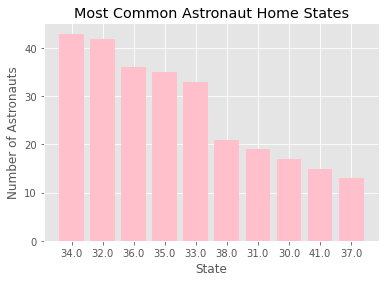

In [18]:
frequent_state = f.frequency(nasa_astronaut_dataset, 19)
top_ten_state = list(frequent_state)[:10]
all_frequency = list(frequent_state.values())
top_ten_frequency = all_frequency[:10]
top_ten = dict(list(frequent_state.items())[0: 10]) 

plt.style.use("ggplot")
plt.bar(top_ten_state, top_ten_frequency, width=0.8, color='pink')
plt.xlabel("State")
plt.ylabel("Number of Astronauts")
plt.title("Most Common Astronaut Home States")

plt.show()

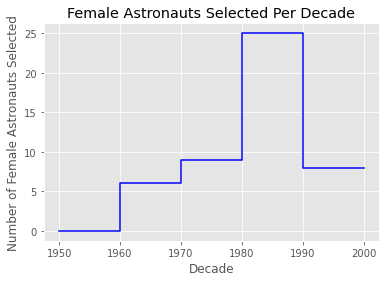

In [46]:
counter = 1
start = 1949
end = 1960
frequency_per_decade = []

while counter <= 6:
    decade = f.filter_by_year(nasa_astronaut_dataset, start, end)
    gender_frequency = f.frequency(decade, 6)
    values = list(gender_frequency.values())
    if len(values) == 2:
        frequency_per_decade.append(values[1])
    else:
        frequency_per_decade.append(0)
    start += 10
    end += 10
    counter += 1
    
decade = [1950, 1960, 1970, 1980, 1990, 2000]
plt.step(decade, frequency_per_decade, color = 'blue')
plt.xlabel('Decade')
plt.ylabel('Number of Female Astronauts Selected')
plt.title('Female Astronauts Selected Per Decade')

plt.show()